<a href="https://colab.research.google.com/github/Zernach/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/132_ZERNACH_%E2%80%94_Intermediate_Linear_Algebra_Assignment_(Tuesday%2C_October_15th_2019)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT COMPLETED BY: [RYAN ZERNACH](http://ryan.zernach.com/objectives/)

![alt text](http://www.zernach.com/wp-content/uploads/2019/09/Ryan-Zernach-Logo-1-e1568499634499.png)

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these three values for any sized list)

In [0]:
import math
import pandas as pd
import numpy as np

def mean_var_std(list):
  # MANUALLY COMPUTE THE MEAN OF THE LIST
  m_sum = 0
  for item in list:
    m_sum+=item
  mean = m_sum/len(list)

  # MANUALLY COMPUTE THE VARIANCE OF THE LIST
  v_sum = 0
  for item in list:
    v_sum += (item - mean)**2
  variance = v_sum/len(list)

  # MANUALLY COMPUTER THE STD DEVIATION OF THE LIST
  std = math.sqrt(variance)

  return (mean, variance, std)

In [26]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

sales_mean, sales_variance, sales_std = mean_var_std(sales)

print("Mean:", sales_mean)
print("Variance:", sales_variance)
print("STD Deviation:", sales_std)

Mean: 3052.714285714286
Variance: 183761.06122448976
STD Deviation: 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
def covariance(list1, list2):
  # MANUALLY COMPUTE THE TWO MEANS OF THE LISTS
  sum1 = 0
  for item in list1:
    sum1 += item
  mean1 = sum1/len(list1)

  sum2 = 0
  for item in list2:
    sum2 += item
  mean2 = sum2/len(list2)

  # MANUALLY COMPUTE THE TOP PART OF COVARIANCE FORMULA
  sum = 0
  for i, item in enumerate(list1, start=0):
    sum += (list1[i] - mean1)(list2[i] - mean2)

  # MANUALLY COMPUTE THE COVARIANCE
  cov = sum/(len(list1)-1)
  return cov

In [29]:
customers = [127, 80, 105, 92, 120, 115, 93]

cov = covariance(sales, customers)
print('Covariance:', cov)

TypeError: ignored

In [0]:
covariance = np.cov(sales, customers)

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [32]:
customers_mean, customers_variance, customers_std = (mean_var_std(customers))

correlation_coeeficient = covariance/(customers_std*sales_std)

correlation_coeeficient

array([[31.66911826,  1.12330631],
       [ 1.12330631,  0.04297913]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [33]:
titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")

titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
age_mean, age_variance, age_std = mean_var_std(titanic['age'])
fare_mean, fare_variance, fare_std = mean_var_std(titanic['fare'])

In [44]:
titanic['survived'].cov(titanic['age'])

-0.31434330031107266

In [42]:
titanic['survived'].cov(titanic['fare'])

6.1460230752312235

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal? (synonym == perpendicular)

(-2, 6)

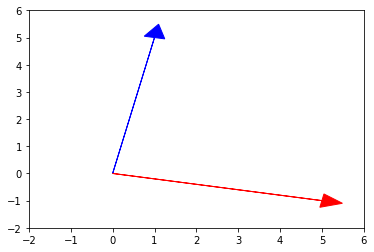

In [52]:
import matplotlib.pyplot as plt

plt.arrow(0, 0, 1, 5, color='blue', head_width=.5, head_length=.5)
plt.arrow(0, 0, 5, -1, color='red', head_width=.5, head_length=.5)
plt.xlim(-2, 6)
plt.ylim(-2, 6)

## 2.2 Are the following vectors orthogonal? Why or why not?

No, they're not — because the dot product between them does not equal zero.

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [54]:
np.dot(a, b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [63]:
c = [2,
     -15,
     6,
     20]

#c_det = np.linalg.det(c)
#print('C_Determinant Squared =', c_det*c_det)

print('c dot c =', np.dot(c, c))

print("c_transposed times c =", (np.array(c).T)*(np.array(c)))

c dot c = 665
c_transposed times c = [  4 225  36 400]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

d = 7i + 12j

e = 2i + 11j - 8k

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [1]:
f = [4, 12, 11, 9, 2]
i_hat = [1]
j_hat = [0, 1]
k_hat = [0, 0, 1]
l_hat = [0, 0, 0, 1]
m-hat = [0, 0, 0, 0, 1]

f = 4i + 12j + 11k + 9l + 2m

SyntaxError: ignored

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

Text(0.5, 0, 'z')

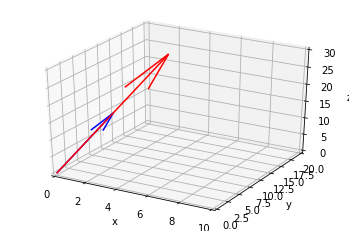

In [67]:
from mpl_toolkits.mplot3d import Axes3D

vector_3d_1 = [1,
             9,
             12]

vector_3d_2 = [2,
               18,
               24]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, vector_3d_1[0], vector_3d_1[1], vector_3d_1[2], length = 1, color = 'blue')
ax.quiver(0, 0, 0, vector_3d_2[0], vector_3d_2[1], vector_3d_2[2], length = 1, color = 'red')
ax.set_xlim([0,10])
ax.set_ylim([0,20])
ax.set_zlim([0,30])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Text(0.5, 0, 'z')

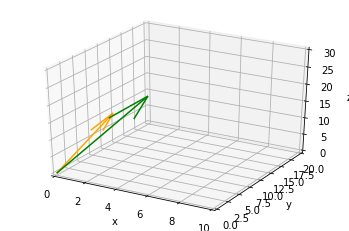

In [69]:
vector_3d_3 = [1,
             9,
             12]

vector_3d_4 = [3,
               10,
               18]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, vector_3d_3[0], vector_3d_3[1], vector_3d_3[2], length = 1, color = 'orange')
ax.quiver(0, 0, 0, vector_3d_4[0], vector_3d_4[1], vector_3d_4[2], length = 1, color = 'green')
ax.set_xlim([0,10])
ax.set_ylim([0,20])
ax.set_zlim([0,30])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# (x, 2 x), where x is all real numbers

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
#The span is the set of all possible vectors that can be created
#with a linear combination (addition/subtraction) of all three vectors.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



(-1, 3)

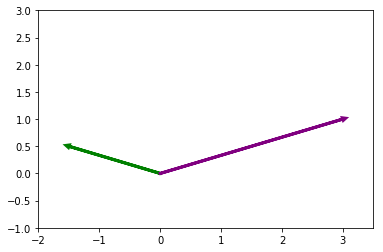

In [4]:
import matplotlib.pyplot as plt

vector1 = [-1.5,.5] 
vector2 = [3, 1]

plt.arrow(0,0, vector1[0], vector1[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, vector2[0], vector2[1], linewidth=3, head_width=.05, head_length=0.05, color ='purple')

plt.xlim(-2,3.5)          
plt.ylim(-1,3)

## 6.2 What does it mean to form a basis?

N-quantity of vectors form a basis if their linear combinations fill the space within that/those dimensions in which they exist.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

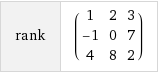

image.png

In [0]:
# Hopefully 3 is the correct answer — thanks, WolframAlpha.

## 7.2 What does the rank of a matrix tell us?

The rank of matrix tells us "the dimensions of the vector space spanned by its columns."

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

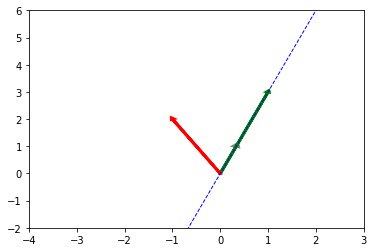

In [99]:
v = [1, 3] 
w = [-1, 2]
proj = np.multiply(.333,v)

plt.xlim(-4,3)          
plt.ylim(-2,6)

plt.plot((-1, 2), (-3, 6), '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.1, head_length=0.1, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red');

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

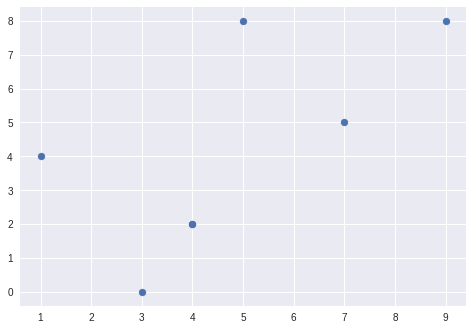

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()